### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.


In [228]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [229]:
iris = datasets.load_iris()
iris1 =pd.DataFrame(iris.data)
iris1_tgt = pd.DataFrame(iris.target)

In [230]:
y = iris.target.reshape(150,1)
y = np.array(y, dtype= 'int8' )
x = iris.data
data = np.concatenate((x,y), axis = 1)
data = pd.DataFrame(data, columns = iris.feature_names + ['target'])


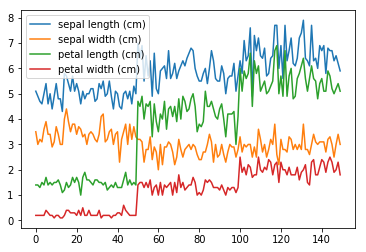

In [231]:
plt.plot(data.drop('target', axis = 1))
plt.legend(data.drop('target', axis = 1).columns)
plt.show()

In [232]:
pca = PCA(n_components = 3)

In [233]:
x_pca = pca.fit_transform(data.drop('target', axis = 1))

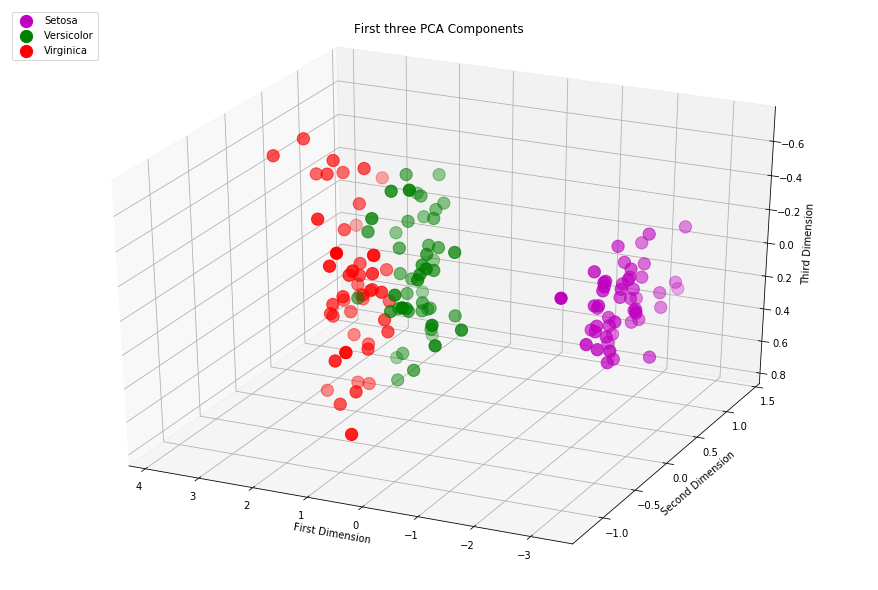

In [234]:
###to get the list of index for each category of target variable (class)
setosa = list(data[data.target == 0.0].index)
versicolor = list(data[data.target == 1.0].index)
virginica = list(data[data.target == 2.0].index)

fig = plt.figure(1, figsize=(12, 8))
pt = Axes3D(fig, elev=-150, azim=65)

pt.scatter(x_pca[setosa,0],x_pca[setosa,1], x_pca[setosa,2], s=150, facecolor = 'm', cmap = 'gist_rainbow_r', label = 'Setosa')
pt.scatter(x_pca[versicolor,0],x_pca[versicolor,1], x_pca[versicolor,2], s=150, facecolor = 'g', cmap = 'gist_rainbow_r', label = 'Versicolor')
pt.scatter(x_pca[virginica,0],x_pca[virginica,1], x_pca[virginica,2], s=150, facecolor = 'r', cmap = 'gist_rainbow_r', label = 'Virginica')



pt.set_title("First three PCA Components", loc = 'center', pad = 20)
pt.set_xlabel("First Dimension")
pt.set_ylabel("Second Dimension")
pt.set_zlabel("Third Dimension")

plt.legend(loc = 'upper left')


plt.show()
